In [1]:
## Importação dos pacotes geopandas e matplotlib
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

import geopandas 
import seaborn as sns

%matplotlib inline
## Leitura do arquivo com as informações dos imóveis rurais
path = '../data/imoveis_rurais.geojson'
df = geopandas.read_file(path)

In [2]:
## Informações sobre o conteúdo do arquivo
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   COD_IMOVEL  736 non-null    object  
 1   NUM_AREA    736 non-null    float64 
 2   COD_ESTADO  736 non-null    object  
 3   NOM_MUNICI  736 non-null    object  
 4   NUM_MODULO  736 non-null    float64 
 5   TIPO_IMOVE  736 non-null    object  
 6   SITUACAO    736 non-null    object  
 7   CONDICAO_I  736 non-null    object  
 8   geometry    736 non-null    geometry
dtypes: float64(2), geometry(1), object(6)
memory usage: 51.9+ KB


In [3]:
df.rename(columns={'NUM_AREA':'Área(ha)'}, inplace=True)

<AxesSubplot: >

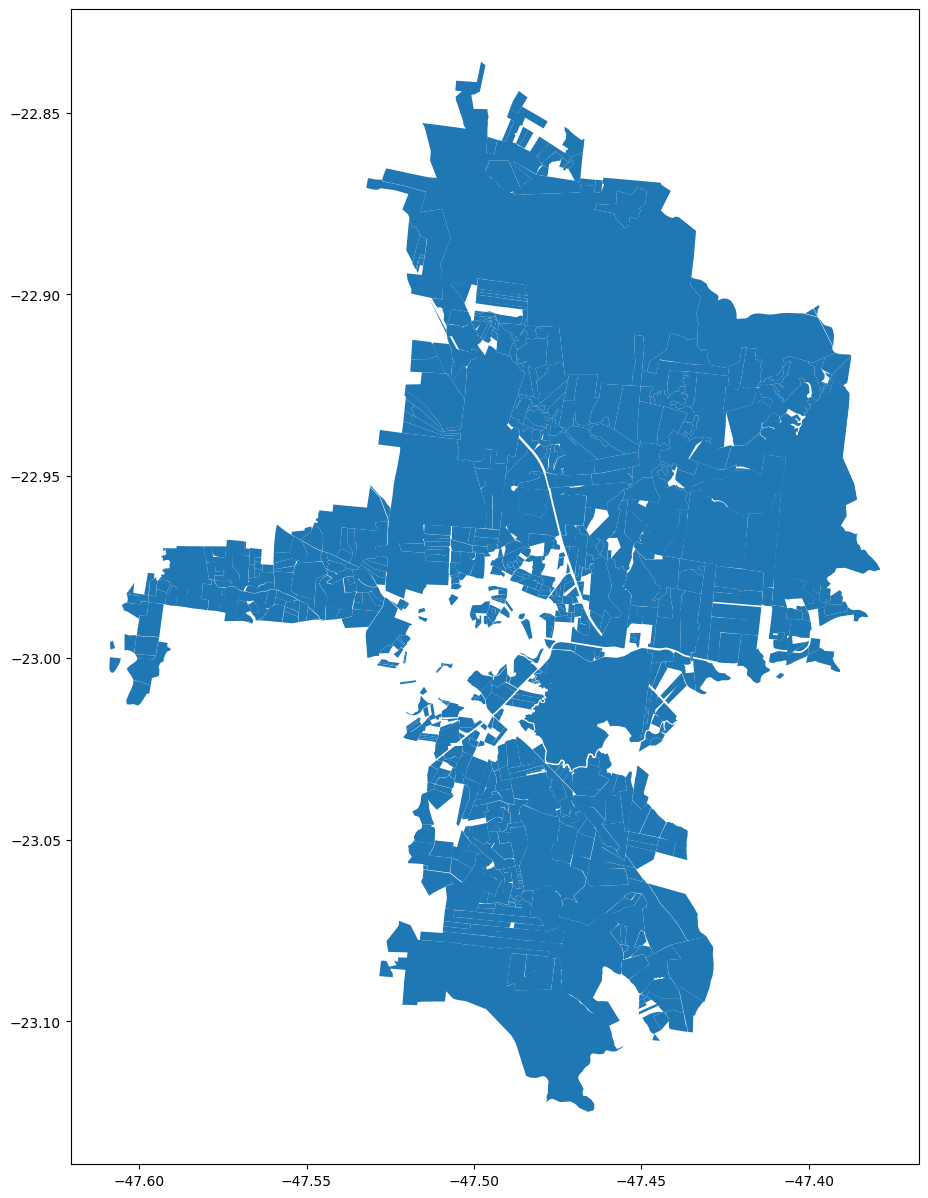

In [4]:
df.plot(figsize=(30,15))

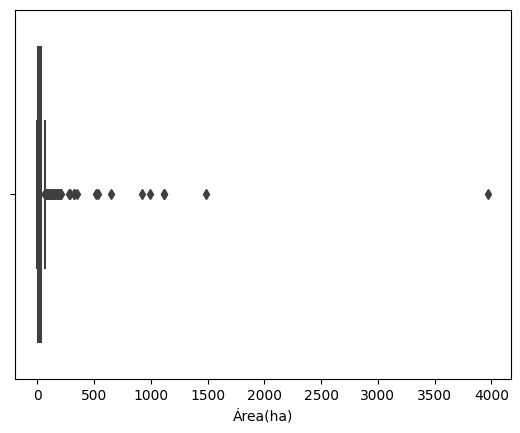

In [5]:
## Distribuição dos imóveis pequenos
sns.boxplot(x=df['Área(ha)'])
plt.show()

<AxesSubplot: xlabel='Área(ha)'>

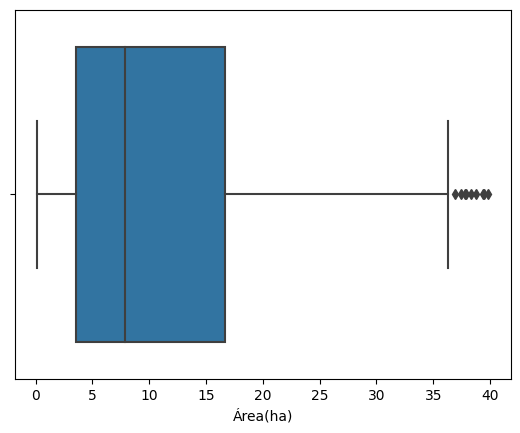

In [6]:
## Distribuição dos imóveis pequenos
pequenos = df[df['Área(ha)'] <= 40]
sns.boxplot(data=pequenos, x='Área(ha)')


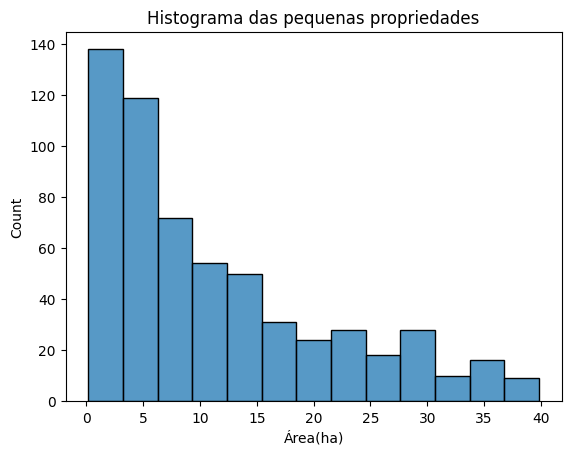

In [7]:
#Histograma das pequenas propriedades
lineplt=sns.histplot(data=pequenos, x='Área(ha)')
lineplt.set(title = 'Histograma das pequenas propriedades')
plt.show()

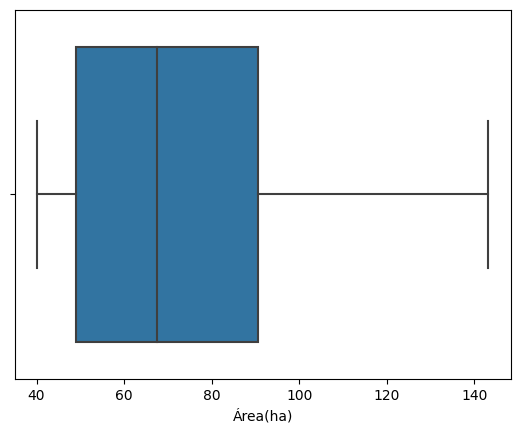

In [8]:
## Distribuição dos imóveis médios (> 40ha e < 150)
medios = df[(df['Área(ha)'] > 40) & (df['Área(ha)'] <= 150)]
sns.boxplot(x=medios['Área(ha)'])
plt.show()


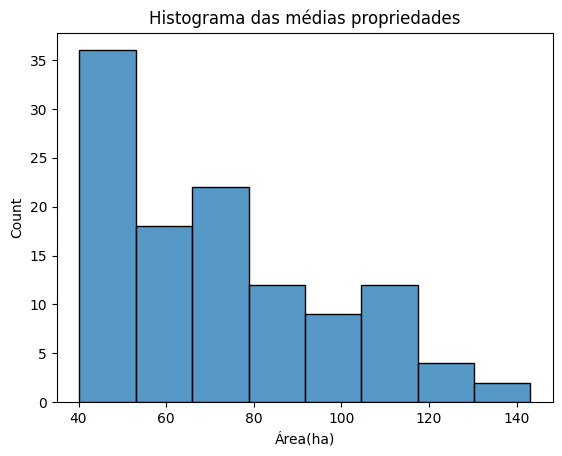

In [9]:
#Histograma das médias propriedades
lineplt=sns.histplot(data=medios, x='Área(ha)')
lineplt.set(title = 'Histograma das médias propriedades')
plt.show()

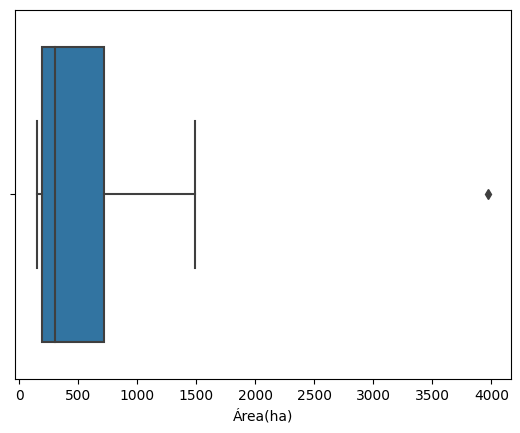

In [10]:
## Distribuição dos grandes imóveis
grandes = df[df['Área(ha)'] > 150]
#sns.boxplot(x=grandes['NUM_AREA'])
sns.boxplot(data=grandes, x='Área(ha)')
plt.show()


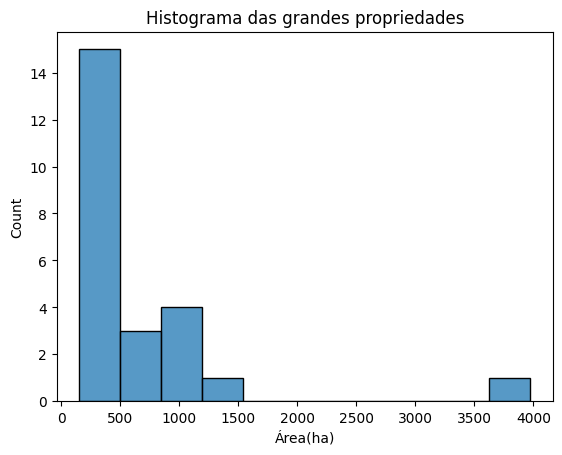

In [11]:
#Histograma das grandes propriedades
lineplt=sns.histplot(data=grandes, x='Área(ha)')
lineplt.set(title = 'Histograma das grandes propriedades')
plt.show()

<AxesSubplot: >

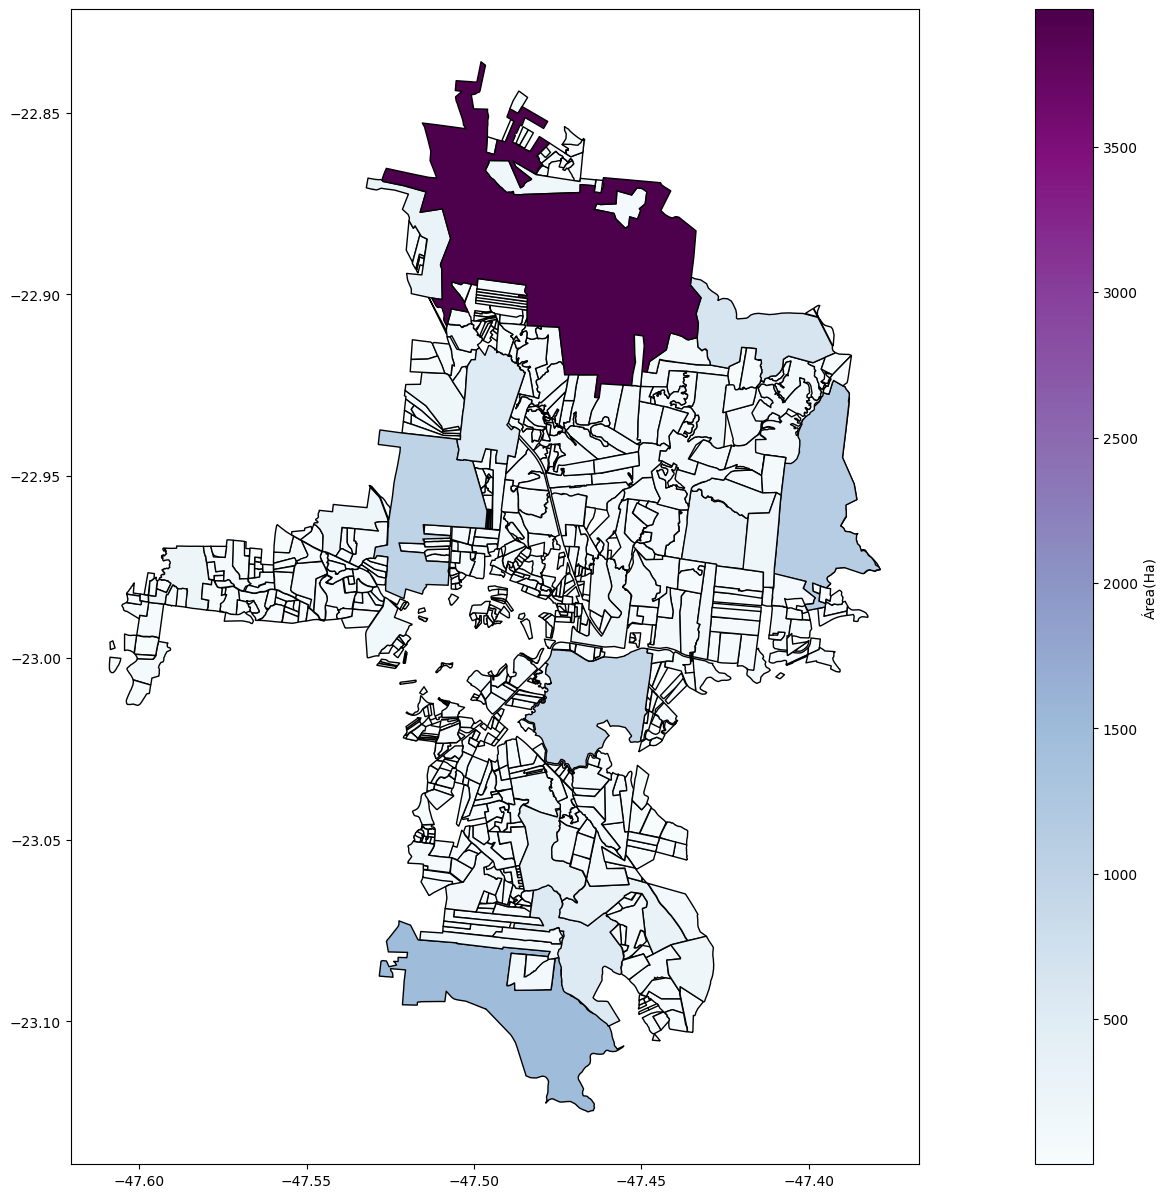

In [12]:
df.plot(column='Área(ha)', cmap='BuPu', edgecolor='k', legend=True, figsize=(30,15),legend_kwds={'label': "Área(Ha)",
    'orientation': "vertical"})
#plt.savefig('capivari.png')

In [13]:
pequenos=0
medios=0
grandes=0

for a in df['Área(ha)']:
    if a <= 40:
        pequenos+=1
    if (a > 40) & (a <= 150):
        medios+=1
    if (a > 150): 
        grandes+=1

print("Quantidade de imóveis pequenos (<=40ha):", pequenos)
print("Quantidade de imóveis médios (>40ha e <=150ha):", medios)
print("Quantidade de imóveis grandes (>150ha):", grandes)

Quantidade de imóveis pequenos (<=40ha): 597
Quantidade de imóveis médios (>40ha e <=150ha): 115
Quantidade de imóveis grandes (>150ha): 24


In [14]:
df['tipo'] = 'NaN'
for index, row in df.iterrows():
    if row['Área(ha)'] <= 40:
        df.loc[index,'tipo'] =  str("Pequenas Propriedades")  
    if ((row['Área(ha)'] > 40) and (row['Área(ha)'] <=150)):
        df.loc[index,'tipo'] =  str("Médias Propriedades")  
    if row['Área(ha)'] > 150:
        df.loc[index,'tipo'] =  str("Grandes Propriedades")     


131333.57074186238


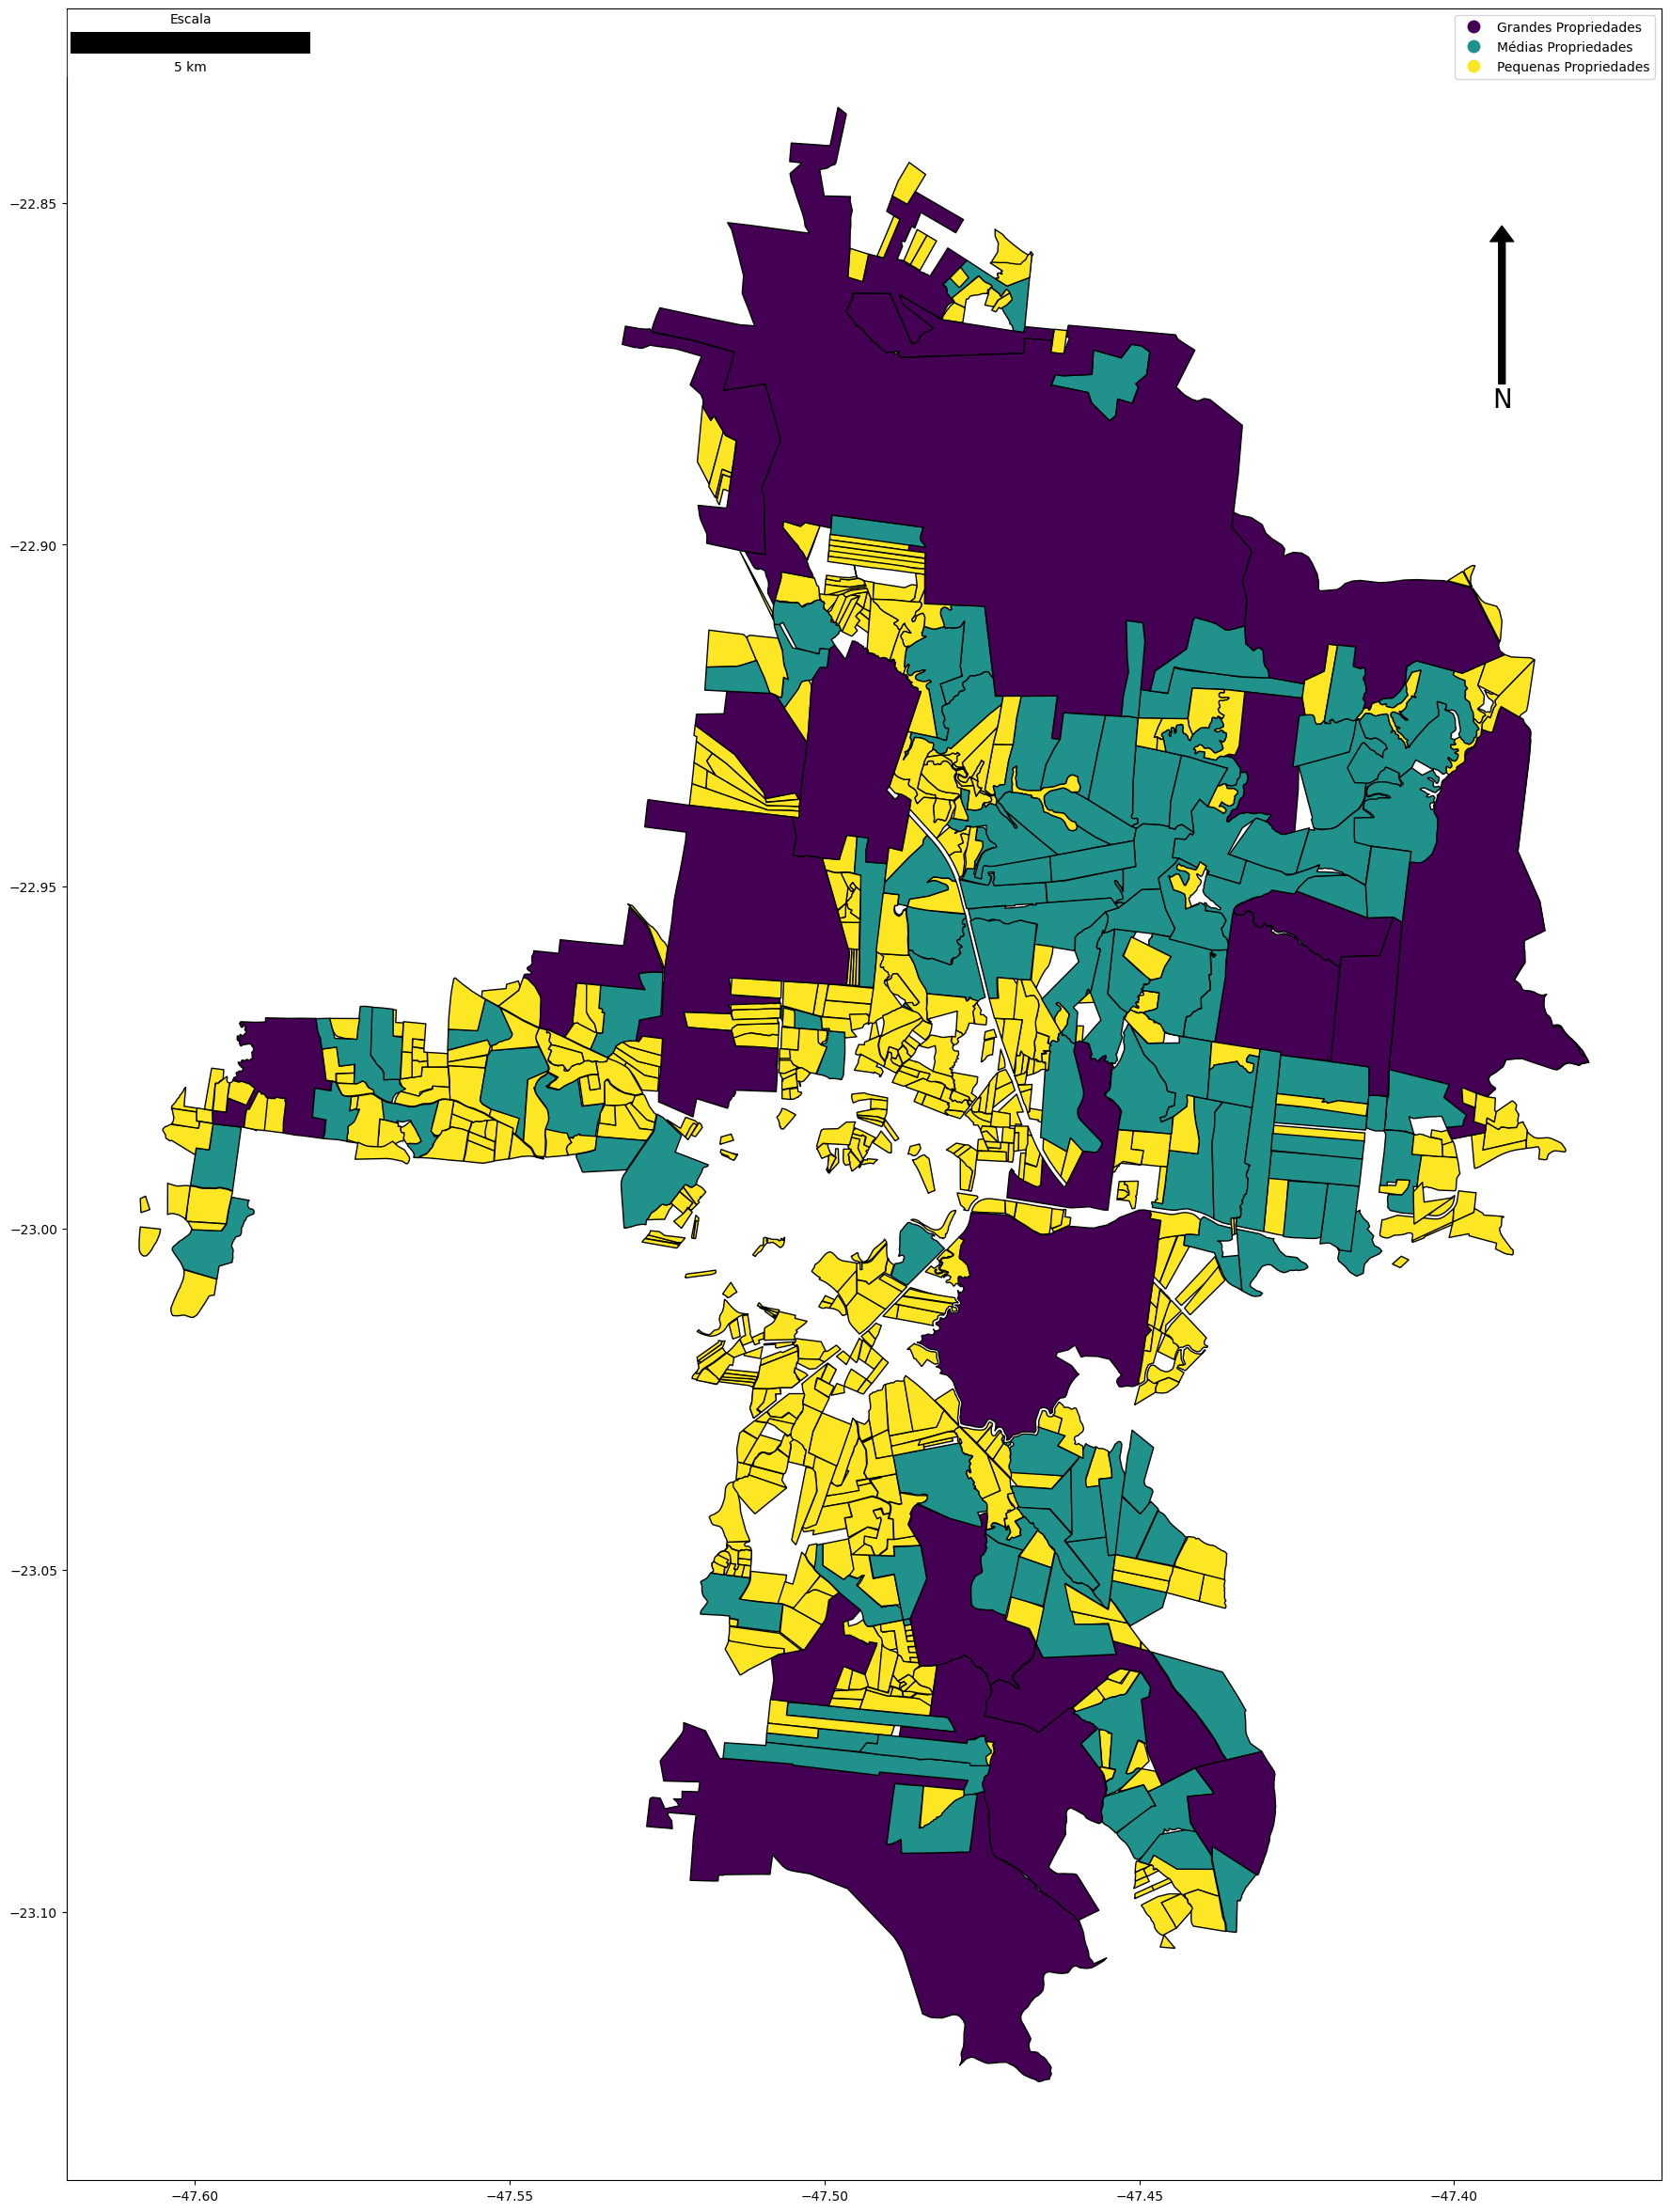

In [15]:
cpv = df.to_crs(4326)
fig, ax = plt.subplots(figsize=(30, 30))
cpv.plot(ax=ax, column='tipo', cmap='viridis', edgecolor='k', legend=True)

x, y, arrow_length = 0.9, 0.9, 0.08
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=18),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

from shapely.geometry.point import Point

points = geopandas.GeoSeries(
    [Point(-47.6235, -22.85), Point(-47.3826, -22.85)], crs=4326)
points = points.to_crs(32619)
distance_meters = points[0].distance(points[1])*5
print(distance_meters)
ax.add_artist(ScaleBar(distance_meters, label='Escala', location='upper left',label_loc='top', scale_loc='bottom'))
plt.savefig('capivari.png')